# Code First, Math Later
## Learning Neural Nets Through Implementation and Examples
### Kyle Shaffer

# Talk Overview
* Overview of Deep Learning and Applications
* Introduction to Keras API
* Implementing Neural Networks
* Beyond the Black Box: Investigating Feature Extraction Layers
* Conclusion

# Overall Approach
* Many people start with textbooks and lessons to learn theory and fundamentals before moving on to application
* Mathematics and formal notation can be abstract and difficult to understand
* We can instead combine fundamentals with examples
* Recent deep learning libraries have made prototyping much easier, but these tools can also be used to learn about neural networks prior to application

## We'd like to go from this....
$$i = \sigma(x_{t}U^i + s_{t-1}W^i)$$
$$f = \sigma(x_{t}U^f + s_{t-1}W^f)$$
$$o = \sigma(x_{t}U^o + s_{t-1}W^o)$$
$$g = \tanh(x_{t}U^g + s_{t-1}W^g)$$
$$c_{t} = c_{t-1} \cdot f + g \cdot i$$
$$s_{t} = \tanh(c_{t}) \cdot o$$

## To this!

In [ ]:
def build_lstm():
    model = Sequential()
    model.add(LSTM(64))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Quick Intro to Deep Learning

# Feedforward Networks

![title](figs/neural-network.png)

# Feedforward Networks
## Some vocab...
* **_layers_**: arrangements of neurons/cells with no lateral connections
* **_activation function_**: non-linear function that modifies values of a vector and passes these values to a subsequent layer
* **_"deep" network_**: neural network with several layers stacked on top of one another
* **_hidden layer_**: layer in a neural network that is neither the input or output layer (in the middle)

# Feedforward Networks
* Often think of hidden layers as "feature extractors"
* These layers have their weights adjusted through the training process, and they "learn" representations that are good for a predictive task
* Different way of thinking from traditional process of manually engineering features before feeding to model

# Feedforward Networks
(Diagram with input, feature extractors, and output)

In [ ]:
# Build a simple MLP NN
def build_mlp():
    mlp = Sequential()
    mlp.add(Dense(output_dim=100))
    mlp.add(Dense(output_dim=50))
    mlp.add(Dense(3))
    mlp.add(Activation('softmax'))
    mlp.compile(loss='categorical_crossentropy', optimizer='sgd')
    return mlp

# Convolutional Networks

# Convolutional Networks
* Often used in image tasks
* Idea of using a "sliding filter" to aggregate features over an image
* Network passes learned feature representations to following layers
* Each subsequent convolutional layer learns more general / abstract concepts

![conv-layers](figs/conv_layers.png)

## What's a convolution?

In [17]:
import numpy as np

edge_filter = np.array([
    [1, 0, -1], 
    [0, 0, 0],
    [-1, 0, 1]
])

In [32]:
# Convolution function
# Here, we're detecting edges in an image

def convolve(input_image, kernel):
    padded_image = np.pad(input_image, (1, 1), 'constant')
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    # We'll store the convolved image in this NumPy array
    convolved_image = np.zeros_like(input_image)
    
    for i in xrange(padded_image.shape[0] - kernel_width + 1):
        for j in xrange(padded_image.shape[1] - kernel_height + 1):
            # Extract an image chunk of size kernel_width x kernel_height
            temp_array = padded_image[i: i+kernel_width, j: j+kernel_height]
            conv_val = np.sum(temp_array * kernel)
            # Clip values outside the 0 - 255 range
            if conv_val < 0:
                push_val = 0
            elif conv_val > 255:
                push_val = 255
            else:
                push_val = conv_val
            convolved_image[i, j] = push_val
    return convolved_image

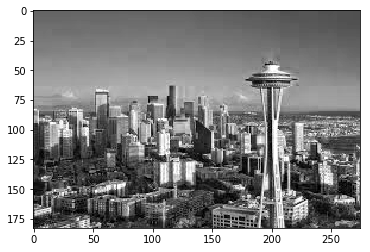

In [3]:
# Let's read in the image and view it
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

img = np.array(Image.open("figs/space_needle.png"))
single_channel_img = img[:, :, 0]
plt.imshow(single_channel_img, plt.get_cmap('gray'))

0 255


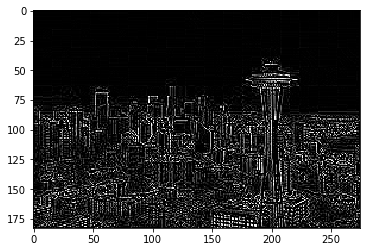

In [33]:
img_edges = convolve(single_channel_img, edge_fiter2)
print img_edges.min(), img_edges.max()
plt.imshow(img_edges, plt.get_cmap('gray'))

## What's a convolution?
![conv-img](https://i.stack.imgur.com/I7DBr.gif)
Source: Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution

# Recurrent Networks

# Recurrent Networks
* Capture sequential dependencies in data
* Often used for language / text data or time series
* Learn a "cell state" that represents relationships between items in input sequence
* These come in several flavors (GRU, LSTM, Bidirectional RNN)
* Caveats: can take very long time to train, optimization can be tricky

![lstm-unrolled](figs/lstm_unrolled.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![inside-lstm](figs/inside_lstm.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

# Introduction to Keras

## Keras Homepage
### https://keras.io/
![keras-homepage](figs/keras_homepage.png)

# Introduction to Keras
* Abstracts implementation details
* Allows for quick prototyping
* Think in terms of "stacking layers"

In [1]:
# General pattern of writing Keras models

# (1) Start a "container" of model layers
# (2) Add initial input and feature extraction layers
# (3) Finally add output layer for final predictions

In [ ]:
# (1) Start a "container" of model layers
model = Sequential()

# (2) Add initial input and feature extraction layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

# (3) Finally add output layer for final predictions
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Implementing Neural Nets: Examples

# CNN for Object Recognition
* CIFAR 10 Dataset

# RNN / LSTM for Document Classification

# Beyond the Black Box: Investigating Feature Extraction Layers

### - Visualizing probability layers
### - Visualizing and investigating feature extraction layers 
### - Visualizing an embedding layer from trained net (?)
### - Looking at LSTM weight output

In [2]:
# Building our model architecture...
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten, LSTM

def build_lstm_model():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64))
    model.add(LSTM(64))
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

Using TensorFlow backend.


In [3]:
# Cool, let's build our model so we can use it - oh wait...
lstm_model = build_lstm_model()

ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=2

In [4]:
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64))
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

In [9]:
import numpy as np

partial_model = build_lstm_feature_extractor()
# Let's make some fake data
X_fake = np.array([np.random.randint(low=0, high=1, size=100) 
                   for _ in xrange(100)])
print "Shape of our fake data:", X_fake.shape

lstm_features = partial_model.predict(X_fake)
print "Shape of feature data from first LSTM layer:", lstm_features.shape

Shape of our fake data: (100, 100)
Shape of feature data from first LSTM layer: (100, 64)


## Retrieving Layer Weights

In [10]:
# Keras models have a `layers` attribute that is simply
# a list containing the (wait for it) layers of your model
partial_model.layers

## Retrieving Recurrent Weights to Understand Network Architecture

In [14]:
# We can also return the actual weights from these layers
lstm_weights = partial_model.layers[1].get_weights()
print type(lstm_weights)
print len(lstm_weights)

for weight_matrix in lstm_weights:
    print weight_matrix.shape

<type 'list'>
3
(200, 256)
(64, 256)
(256,)


In [15]:
# Still just NumPy arrays!
lstm_weights[0]

array([[ 0.09647181, -0.00444315, -0.06995001, ...,  0.06754892,
         0.09280501, -0.10184904],
       [-0.03805228, -0.08389717,  0.0314132 , ..., -0.06601561,
        -0.0134097 , -0.11257187],
       [-0.08097458,  0.00556927, -0.03444121, ..., -0.01745003,
         0.06033615,  0.00982894],
       ..., 
       [-0.01087264, -0.10222536,  0.01782394, ...,  0.05374201,
        -0.00720569,  0.07986783],
       [ 0.00661587,  0.07065662, -0.05745438, ..., -0.10546719,
         0.1085911 , -0.07406627],
       [ 0.03614742, -0.0855208 , -0.11109346, ...,  0.08710361,
        -0.09559297, -0.03116204]], dtype=float32)

# Recap
* We've gone over popular architectures and some fundamentals in deep learning
* Learned about Keras as a tool to implement and experiment with these architectures
* Found ways to "peer into" network architectures to better understand data transformations as they happen in the network

# Recap
* Taken some of the "mystery" out of neural networks
* Nothing magic - vectors, matrices, functions which can be implemented in familiar tools (NumPy)
* Iterative approach to learning about neural networks - fundamentals/theory -> practice -> repeat!

# Thanks! Questions?